In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import logging
# from argparse import ArgumentParser
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score

In [45]:
from chaosnet import *

In [70]:
data =  np.genfromtxt(r"C:\Users\shiva\chaos dyn\train.csv",delimiter=',',skip_header=1)

In [101]:
data = np.nan_to_num(data)

In [133]:
y_train = data[:4000,0].astype('int')
X_train = data[:4000,1:].astype('float')
y_test = data[4000:5000,0].astype('int')
X_test = data[4000:5000,1:].astype('float')

# Hyperparamaters

In [134]:
a = 0.0
c = 1.0
b = 0.331 # Found by hyperparametertuning 
q = 0.336
length = 20000
num_classes = 10
samples_per_class = 21
check = "Sk-B"
details = "full"
var = 42
method = "TT-SS" # or TT
epsilon = 0.01

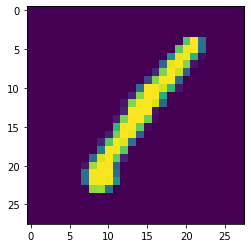

In [135]:
plt.imshow(X_train[1].reshape(28,28));

In [136]:
X_train = normalize_data(X_train)
X_test = normalize_data(X_test)

# 1-Layer Network

In [137]:
timeseries = iterations(q,a,b,c,length,check)
train_proba = probability_calculation(X_train,timeseries,b,epsilon)
test_proba = probability_calculation(X_test,timeseries,b,epsilon)

In [138]:
num_features = X_train.shape[1]
avg_class_dist = np.zeros((num_classes,num_features))

In [139]:
for n_cl in range(0, num_classes):
        avg_class_dist[n_cl,:] = class_avg_distance(train_proba, y_train, lab = n_cl)

In [140]:
y_pred_val = cosine_similar_measure(test_proba, y_test,a,b,c,avg_class_dist)

accuracy
58.200
precision
0.630
recall
0.578
f1score
0.592
Confusion matrix
 [[56  0  0  1  1 18 10  4  0  4]
 [ 0 91  1  2  0 11  0  1  3  3]
 [ 1  5 63  4  5 15  7  1  6  8]
 [ 1  3  1 62  1 22  0  2 13  5]
 [ 0  1  2  1 51  7  3  2  2 20]
 [ 6  1  0 16  1 44  4  1  7 10]
 [ 3  3  3  4  4 17 62  0  1  6]
 [ 0  3  1  1  4 18  1 56  0 13]
 [ 0  4  4 16  2 15  2  0 47  4]
 [ 0  5  0  1 17 12  0  8  3 50]]


# 2-Layer Network

In [141]:
q2 = 0.56
coeff0 = 0.999/2.0
coeff1 = 0.999/2.0
coeff2 = 1 - (coeff0 + coeff1)/2

In [142]:
timeseries = iterations(q, a, b, c, length, check )
layer_2_mat = chaos_second_layer(X_train, y_train, q, a, b, c, length, check, timeseries, epsilon, q2, coeff0, coeff1, coeff2 )
train_proba = probability_calculation(layer_2_mat, timeseries, b, epsilon)


even number of features in the dataset


In [143]:
layer_2_mat_test = chaos_second_layer(X_test, y_test, q, a, b, c, length, check, timeseries, epsilon, q2, coeff0, coeff1, coeff2 )
test_proba = probability_calculation(layer_2_mat_test, timeseries, b, epsilon)

even number of features in the dataset


In [144]:
num_features = X_train.shape[1]
avg_class_dist = np.zeros((num_classes,layer_2_mat.shape[1]))

In [145]:
for n_cl in range(0, num_classes):
    avg_class_dist[n_cl,:] = class_avg_distance(train_proba, y_train, lab = n_cl)

In [146]:
y_pred_val = cosine_similar_measure(test_proba, y_test,a,b,c,avg_class_dist)

accuracy
73.600
precision
0.748
recall
0.732
f1score
0.735
Confusion matrix
 [[ 70   1   1   0   0  17   5   0   0   0]
 [  0 105   0   1   0   4   0   0   2   0]
 [  1   5  87   7   5   4   2   2   2   0]
 [  1   2   1  75   1  10   2   2  11   5]
 [  0   1   2   1  71   2   0   0   0  12]
 [  0   6   0  19   2  49   2   0   6   6]
 [  0   5   1   0   8   7  80   0   0   2]
 [  0   9   0   0   1   0   0  75   1  11]
 [  0   4   3  11   2   5   2   1  62   4]
 [  0   8   0   2   8   3   0   7   6  62]]
